In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [18]:
data = pd.read_csv('plot_data.csv')

In [18]:
data.shape

(5442, 6)

## Null values imputation with KNN imputer

In [19]:
feature_with_null = "Eye Pupil"

# Creating a new DataFrame with only the feature containing null values
data_missing = data[[feature_with_null]]

# Initializing the KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Performing imputation on the selected feature
data_imputed = pd.DataFrame(imputer.fit_transform(data_missing), columns=[feature_with_null])

# Updating the original DataFrame with the imputed values
data[feature_with_null] = data_imputed[feature_with_null]


In [20]:
data.isnull().sum()

Opened Programs       0
Frame Number          0
Eye Aspect Ratio      0
Mouth Aspect Ratio    0
Head Tilt Degree      0
Eye Pupil             0
dtype: int64

In [20]:
scaler = StandardScaler()
features = data[['Opened Programs', 'Frame Number', 'Eye Aspect Ratio', 'Mouth Aspect Ratio', 'Head Tilt Degree', 'Eye Pupil']]
c = scaler.fit_transform(features)

In [21]:
#scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


In [22]:

num_components = 3

# Apply PCA
pca = PCA(n_components=num_components)
features_pca = pca.fit_transform(features_standardized)

# Create a DataFrame with the reduced features
data_pca = pd.DataFrame(data=features_pca, columns=['PCA_Component1', 'PCA_Component2','PCA_Component3'])

# Concatenate the reduced features with the original DataFrame
data = pd.concat([data, data_pca], axis=1)

In [23]:
# Choose a range of k values
k_values = range(2, 11)  # You can adjust the range as needed
# List to store silhouette scores
silhouette_scores = []

# Iterate over different k values
for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to your data
    kmeans.fit(features)
    
    # Predict the clusters for each data point
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(features, labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal k based on the maximum silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]

# Print the optimal k value
print(f"Optimal number of clusters (k): {optimal_k}")


Optimal number of clusters (k): 2


In [24]:
# Specify the number of clusters (you can adjust this)
num_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(features_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

In [25]:
data

,Opened Programs,Frame Number,Eye Aspect Ratio,Mouth Aspect Ratio,Head Tilt Degree,Eye Pupil,PCA_Component1,PCA_Component2,PCA_Component3,Cluster
0,1,5,0.288029,0.683386,0.518621,0.581871,2.424198,0.813158,-0.996374,0
1,1,6,0.322586,0.651688,0.519213,0.594595,2.633212,0.092142,-0.599485,0
2,1,7,0.300121,0.673784,0.517741,0.573613,2.608873,0.663556,-0.924132,0
3,1,8,0.211984,0.669791,0.513557,0.622417,1.421261,1.201468,-1.816627,0
4,1,9,0.294016,0.659469,0.516893,0.541667,2.840161,0.603980,-1.325659,0
...,...,...,...,...,...,...,...,...,...,...
5437,12,624,0.279048,0.722129,0.505878,0.539819,0.029224,1.485356,0.455573,1
5438,12,625,0.287964,0.704276,0.507119,0.578201,-0.220434,1.025779,0.738198,1
5439,12,626,0.255847,0.757265,0.508903,0.727181,-1.830308,1.559017,1.663185,1
5440,12,627,0.260445,0.827014,0.510721,0.671429,-1.349665,2.595303,1.718956,1


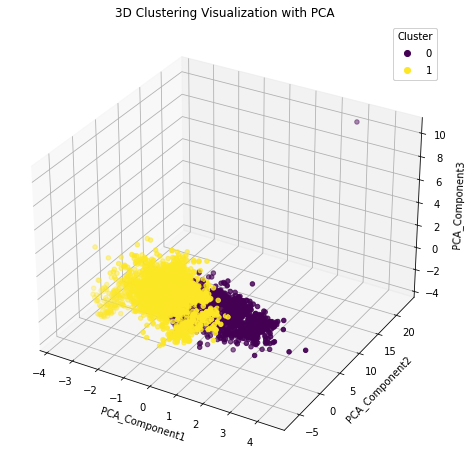

In [27]:
#Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Afficher la visualisation en 3D avec coloration par cluster
scatter = ax.scatter(data['PCA_Component1'], data['PCA_Component2'], data['PCA_Component3'], c=data['Cluster'], cmap='viridis', marker="o")


legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Titre et labels des axes
ax.set_title('3D Clustering Visualization with PCA')
ax.set_xlabel('PCA_Component1')
ax.set_ylabel('PCA_Component2')
ax.set_zlabel('PCA_Component3')

# Afficher le graphique
plt.show()